## Advanced Linear Regression Assignment - Surprise Housing

### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know the following things about the prospective properties:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

### Steps carried 

1. Data Reading and Understanding 
2. EDA 
3. Feature Engineering
4. Preprocessing 
5. Model Building - Ridge and Lasso 
6. Model Evaluation - Comparing 2 models 

In [118]:
#import necessery libraries 
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [119]:
#import warnings 
import warnings 
warnings.filterwarnings('ignore')

In [120]:
#to display max rows and columns
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

###  1. Data Reading and Understanding

In [121]:
#read the data 
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,"2,003.00",RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,"1,976.00",RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,"2,001.00",RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,"1,998.00",Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,"2,000.00",RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [122]:
#shape of the data 
df.shape

(1460, 81)

#### Understanding each variables through the dictionary provided 

The following categorical columns have one level as NA, which might be erroneously considered as missing value by pandas:-
1. Alley : NA = No alley access
2. BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 : NA = No Basement
3. FireplaceQu : NA = No Fireplace
4. GarageType, GarageFinish, GarageQual, GarageCond : NA = No Garage
5. PoolQC : NA = No Pool
6. Fence : NA = No Fence
7. MiscFeature : NA = None

So, we need to replace these by 'None' before finding missing values.

To do the same, lets read the csv file again and set the parameter 'keep_default_na' to False

In [123]:
# Preventing 'NA' to be read as 'NaN' by pandas
df = pd.read_csv('train.csv', keep_default_na=False)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [124]:
## Replacing all 'NA' of all above mentioned columns by 'None'
df[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']] = df[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']].replace("NA", "None")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


In [125]:
#basic info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

By analysing the data type of each columns w.r.t the description provided, we can deduce that the data type of the following columns need to be changed  

1. variables 'MSSubClass', 'OverallQual' and 'OverallCond' need to be converted to object data type
2. variables 'LotFrontage' and 'MasVnrArea' needs to be converted to numeric type.

In [126]:
df[['MSSubClass', 'OverallQual', 'OverallCond']] = df[['MSSubClass', 'OverallQual', 'OverallCond']].astype(object)

In [127]:
df['LotFrontage'] = pd.to_numeric(df['LotFrontage'], errors='coerce')
df['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'], errors='coerce')

In [128]:
#check whether the change has implemented or not 
df[['MSSubClass', 'OverallQual', 'OverallCond', 'LotFrontage', 'MasVnrArea']].dtypes

MSSubClass      object
OverallQual     object
OverallCond     object
LotFrontage    float64
MasVnrArea     float64
dtype: object

In [129]:
#view the statistical summary of the data 
df.describe()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,"1,460.00","1,201.00","1,460.00","1,460.00","1,460.00","1,452.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00"
mean,730.50,70.05,"10,516.83","1,971.27","1,984.87",103.69,443.64,46.55,567.24,"1,057.43","1,162.63",346.99,5.84,"1,515.46",0.43,0.06,1.57,0.38,2.87,1.05,6.52,0.61,1.77,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,"2,007.82","180,921.20"
std,421.61,24.28,"9,981.26",30.20,20.65,181.07,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,1.63,0.64,0.75,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,"79,442.50"
min,1.00,21.00,"1,300.00","1,872.00","1,950.00",0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,"2,006.00","34,900.00"
25%,365.75,59.00,"7,553.50","1,954.00","1,967.00",0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,"1,129.50",0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1.00,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,"2,007.00","129,975.00"
50%,730.50,69.00,"9,478.50","1,973.00","1,994.00",0.00,383.50,0.00,477.50,991.50,"1,087.00",0.00,0.00,"1,464.00",0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,2.00,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,"2,008.00","163,000.00"
75%,"1,095.25",80.00,"11,601.50","2,000.00","2,004.00",166.00,712.25,0.00,808.00,"1,298.25","1,391.25",728.00,0.00,"1,776.75",1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,"2,009.00","214,000.00"
max,"1,460.00",313.00,"215,245.00","2,010.00","2,010.00","1,600.00","5,644.00","1,474.00","2,336.00","6,110.00","4,692.00","2,065.00",572.00,"5,642.00",3.00,2.00,3.00,2.00,8.00,3.00,14.00,3.00,4.00,"1,418.00",857.00,547.00,552.00,508.00,480.00,738.00,"15,500.00",12.00,"2,010.00","755,000.00"


We could see that for some of the variables (MasVnrArea, 2ndFlrSF, WoodDeckSF), there is a considerable difference in mean and median which implies that the outliers might be present in the data 

#### Handling Missing Values 

In [130]:
#lets look at the percentage of Missing Values 
df.isnull().sum().sort_values(ascending = False)

LotFrontage      259
MasVnrArea         8
Id                 0
KitchenAbvGr       0
GarageYrBlt        0
GarageType         0
FireplaceQu        0
Fireplaces         0
Functional         0
TotRmsAbvGrd       0
KitchenQual        0
BedroomAbvGr       0
GarageCars         0
HalfBath           0
FullBath           0
BsmtHalfBath       0
BsmtFullBath       0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
GarageFinish       0
GarageArea         0
Electrical         0
PoolQC             0
SaleCondition      0
SaleType           0
YrSold             0
MoSold             0
MiscVal            0
MiscFeature        0
Fence              0
PoolArea           0
GarageQual         0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
PavedDrive         0
GarageCond         0
1stFlrSF           0
HeatingQC          0
CentralAir         0
LandSlope          0
OverallCond        0
OverallQual        0
HouseStyle         0
BldgType     

We could see that variables 'LotFrontage' and 'MasVnrArea' have missing values. Lets go ahead and treat those  

In [131]:
# Replacing missing values in the above meniioned two columns by their medians
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace=True)

In [132]:
## Check for missing values again 
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

Therefore, we have cleaned the data 

## 2. EDA

#### Univariate Analysis

Lets look at the target variable SalePrice --> Since, its a continuous variable, let plot the histogram and bloxplot of it 

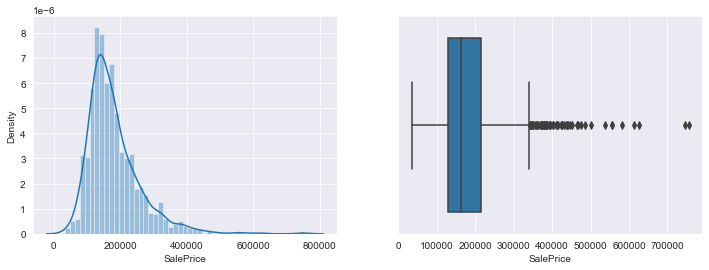

In [133]:
sns.set_style('darkgrid')
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
sns.distplot(df['SalePrice'])

plt.subplot(1,2,2)
sns.boxplot(df['SalePrice'])

plt.show()

The target variable 'SalePrice' is right skewed (as it has outliers towards upper end)

In [134]:
#lets check the skewness of Target Variable - 'SalePrice'
df['SalePrice'].skew()

1.8828757597682129

In [135]:
## Check the kurtosis of target variable
df['SalePrice'].kurt()

6.536281860064529

Since the skewness is greater than 1, we could say that the target variable 'SalePrice' is highly skewed 

In order to overcome the skewness, lets transform our target variable using log function

In [136]:
df['SalePrice'] = np.log(df['SalePrice'])

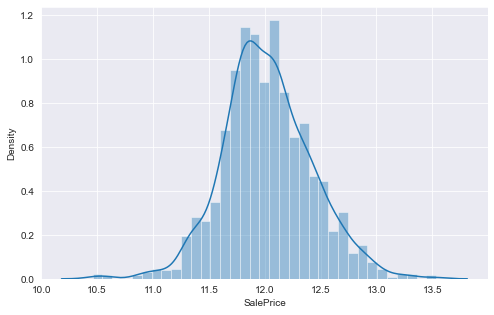

In [137]:
plt.figure(figsize = (8,5))
sns.distplot(df['SalePrice'])
plt.show()

In [138]:
#lets check the skewness of Target Variable - 'SalePrice'
df['SalePrice'].skew()

0.12133506220520406

In [139]:
## Check the kurtosis of target variable again
df['SalePrice'].kurt()

0.8095319958036296

Therefore, our target variable 'SalePrice' has a normal distribution now 

#### Analysing the response variables

#### Analysing Categorical Variables

In [140]:
#extracting cateorical columns 
df_cat_cols = df.select_dtypes(include = 'object')
df_cat_cols.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,2003,RFn,TA,TA,Y,None,None,None,WD,Normal
1,20,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,1976,RFn,TA,TA,Y,None,None,None,WD,Normal
2,60,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2001,RFn,TA,TA,Y,None,None,None,WD,Normal
3,70,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,1998,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,60,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2000,RFn,TA,TA,Y,None,None,None,WD,Normal


In [141]:
df_cat_cols.shape

(1460, 47)

In [142]:
#create a list of categorical variables 
cat_cols_list = [col for col in df_cat_cols.columns]

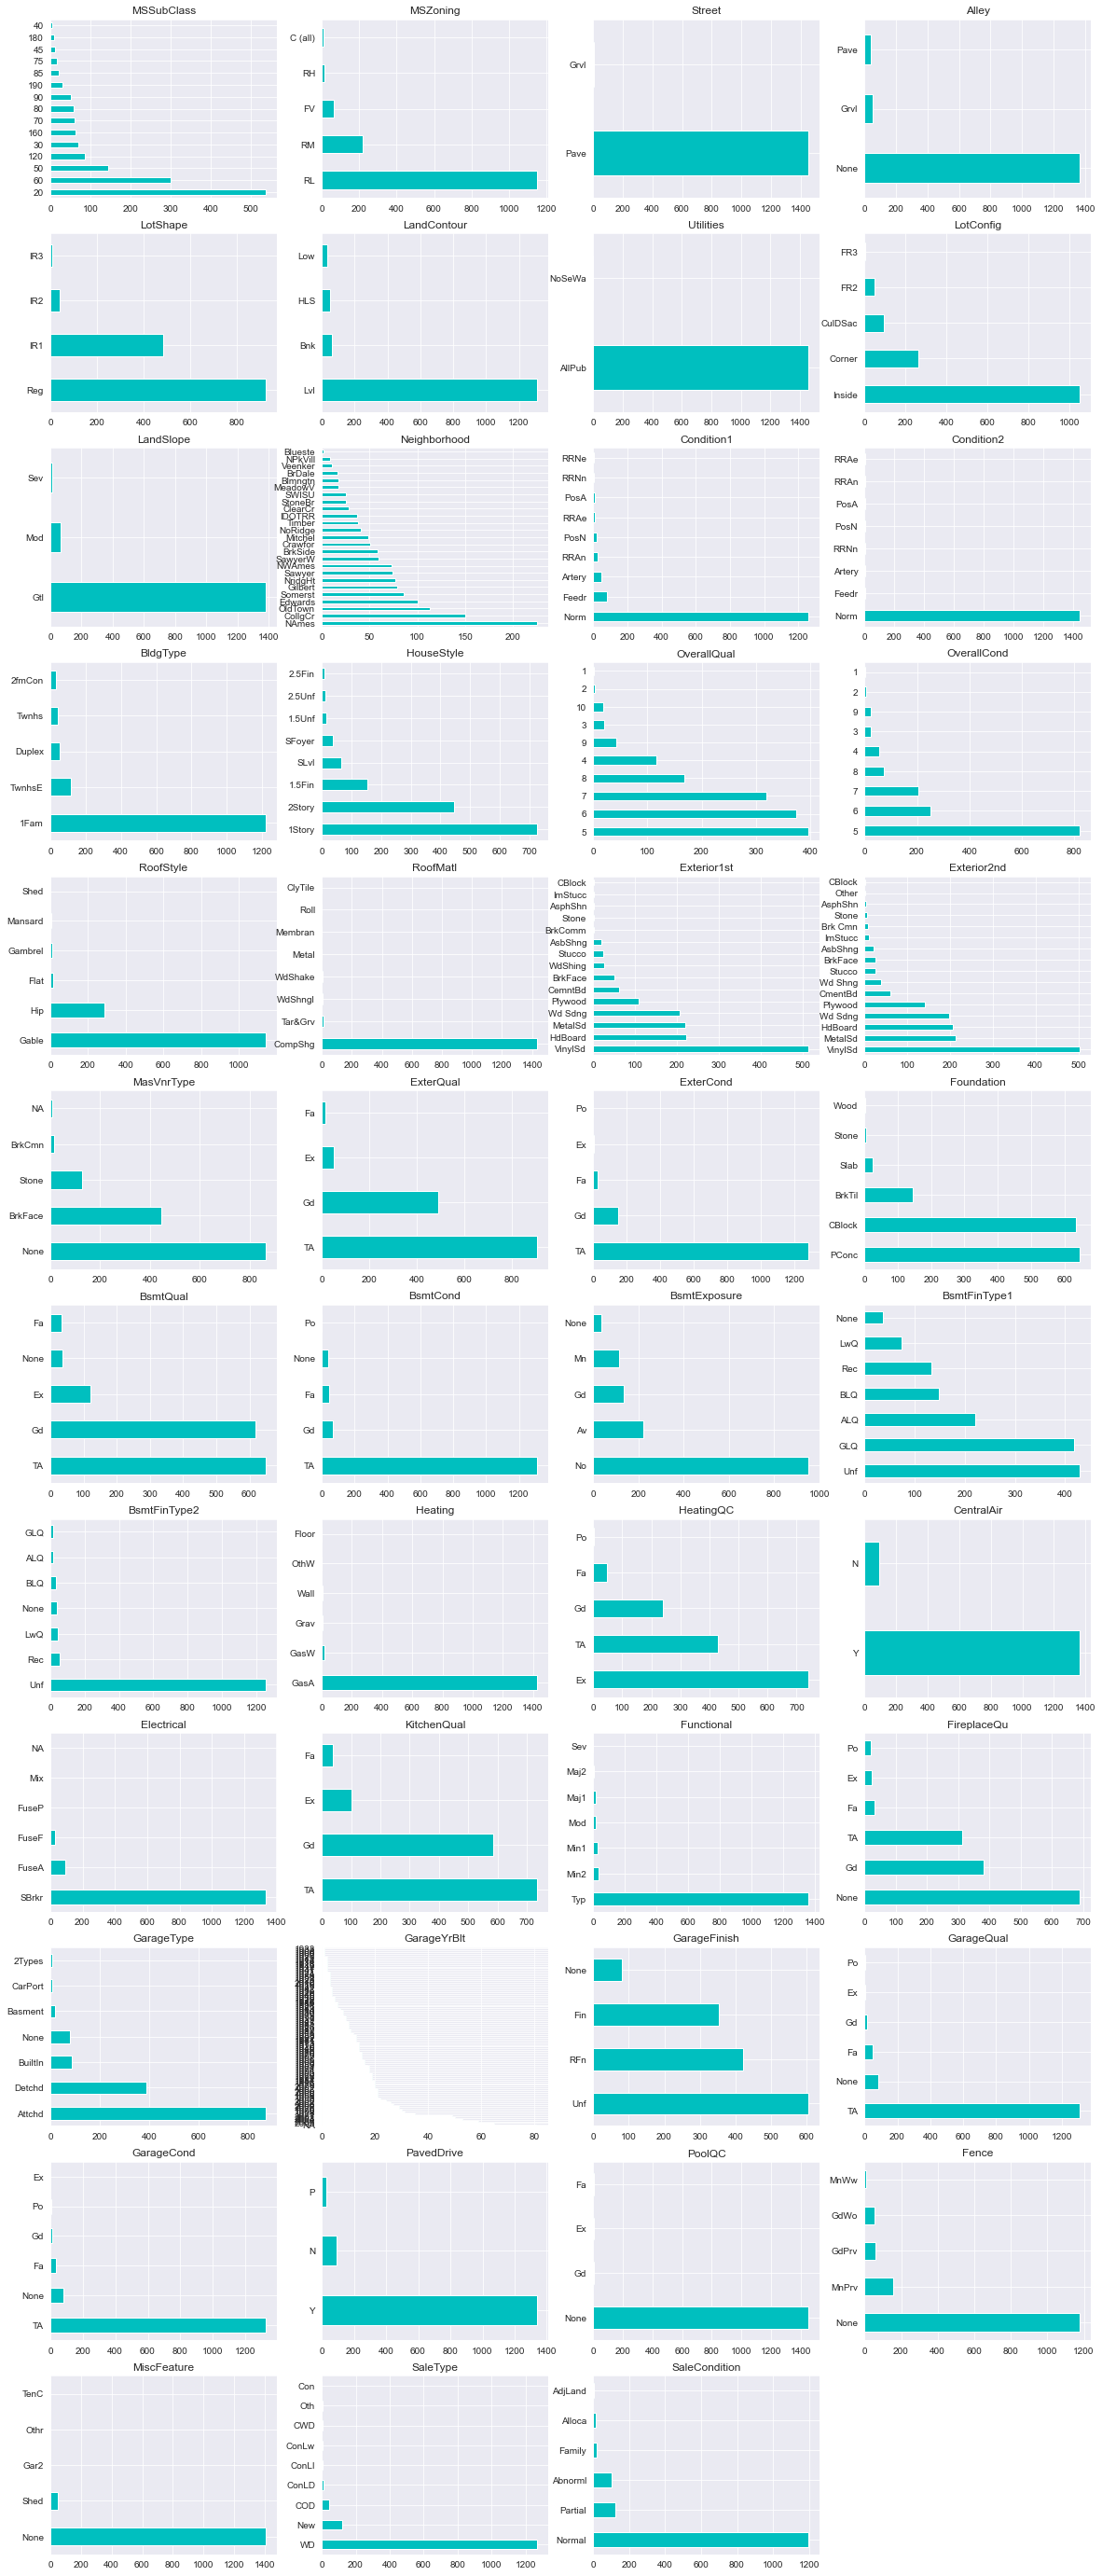

In [143]:
plt.figure(figsize = (20, 50))
for i in range(len(cat_cols_list)):
    plt.subplot(12,4,i+1)
    df_cat_cols[cat_cols_list[i]].value_counts().plot.barh(color = 'c')
    plt.title(cat_cols_list[i])
plt.show()

From the above graphs, we can depict that no single variable whose all values lies in a single category. Hence, we are unable to drop any columns

#### Analysing numerical variables

In [144]:
#extracting numerical variables 
df_num_cols = df.select_dtypes(include = ['int64', 'float64'])
df_num_cols.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,65.00,8450,2003,2003,196.00,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,12.25
1,2,80.00,9600,1976,1976,0.00,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,12.11
2,3,68.00,11250,2001,2002,162.00,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,12.32
3,4,60.00,9550,1915,1970,0.00,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,11.85
4,5,84.00,14260,2000,2000,350.00,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,12.43


In [145]:
#number of columns of numerical variables
df_num_cols.shape

(1460, 34)

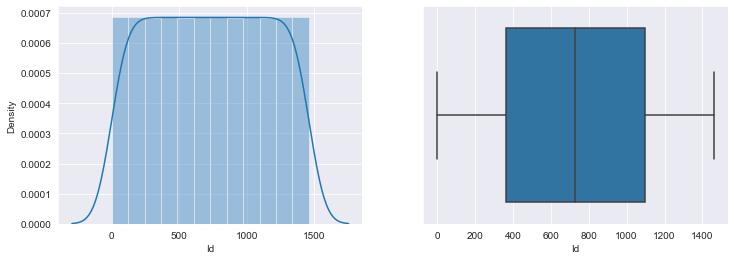

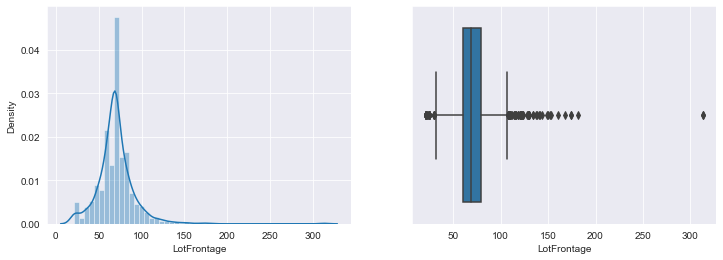

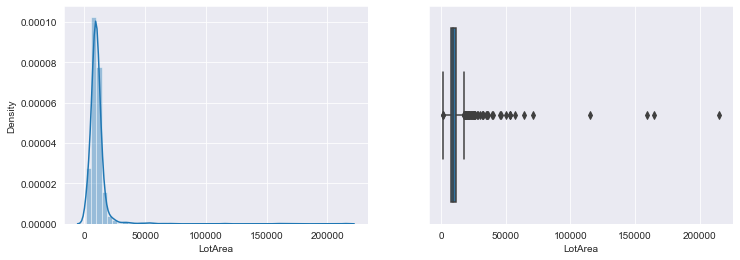

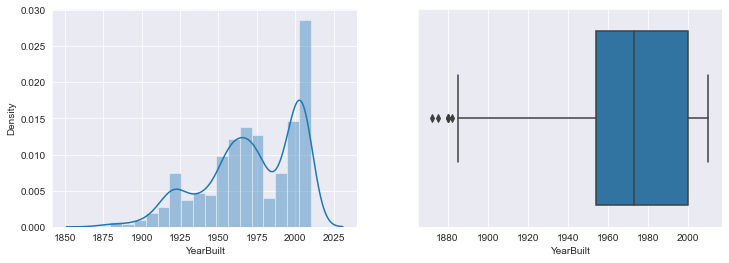

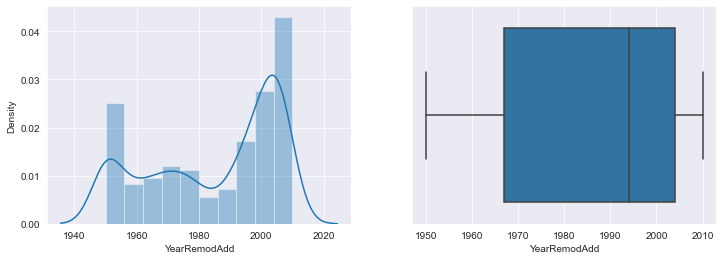

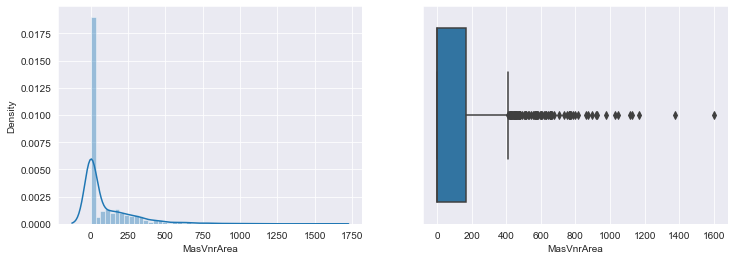

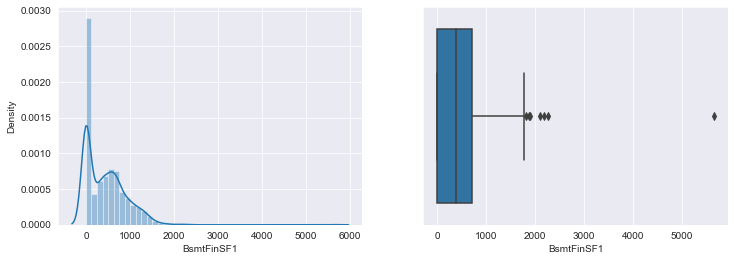

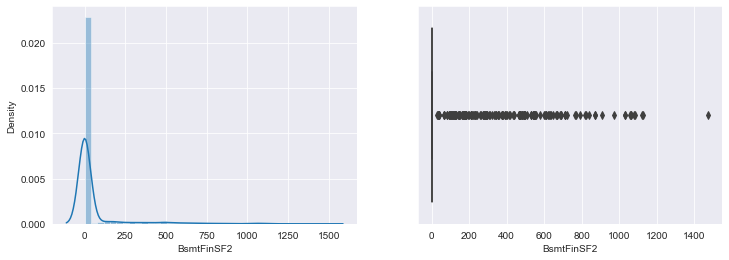

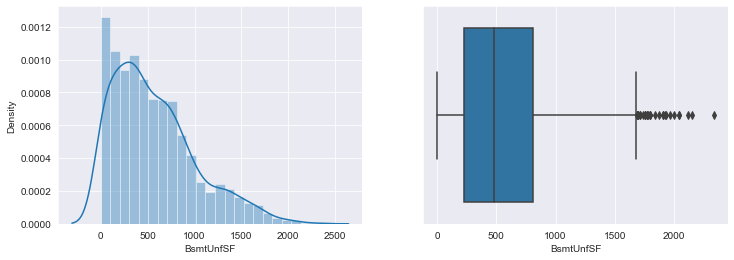

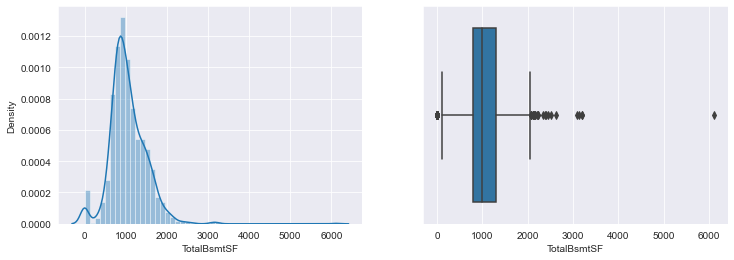

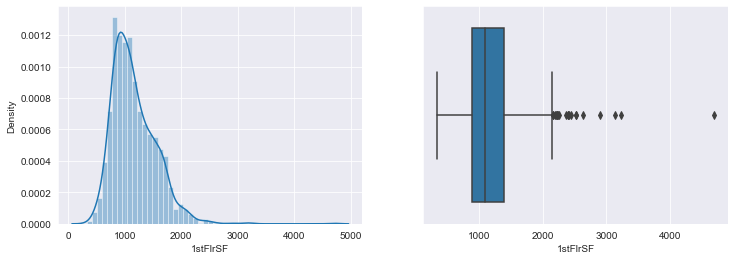

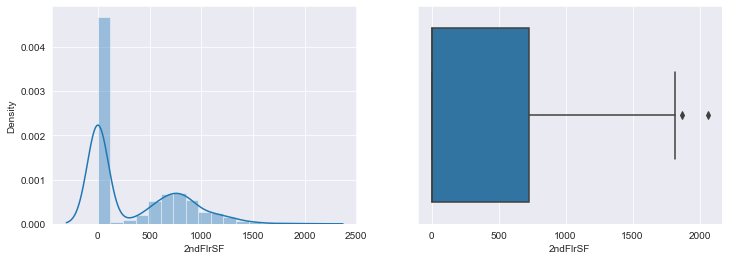

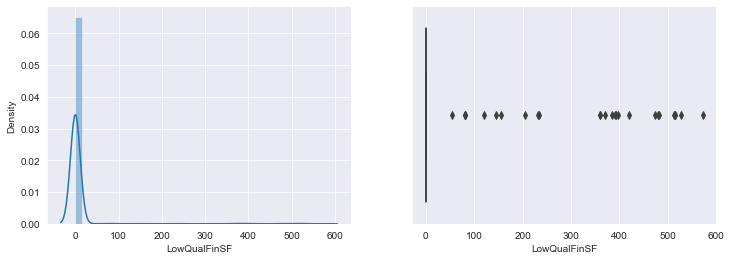

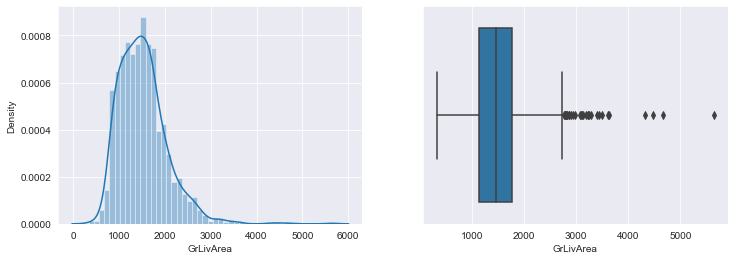

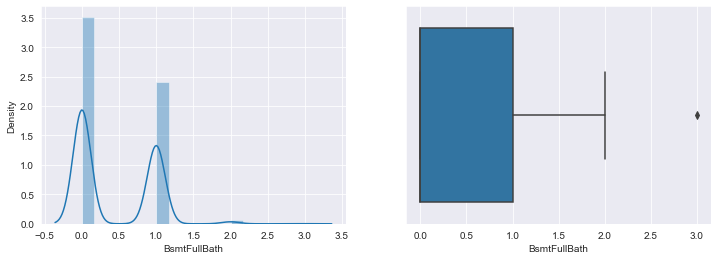

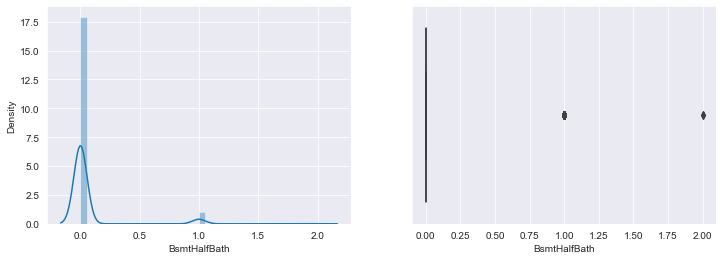

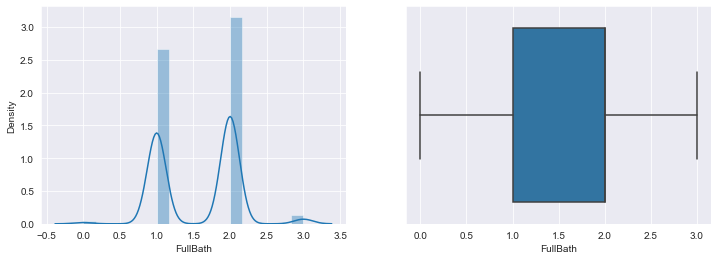

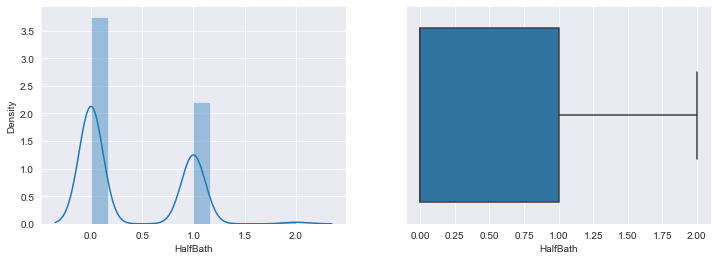

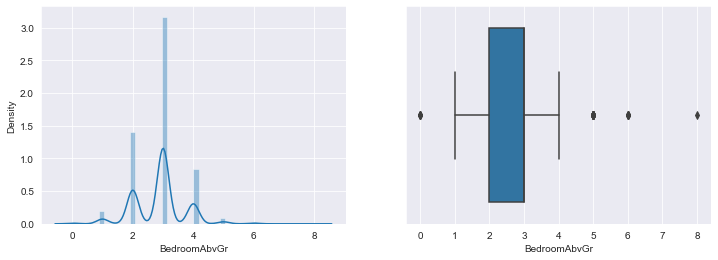

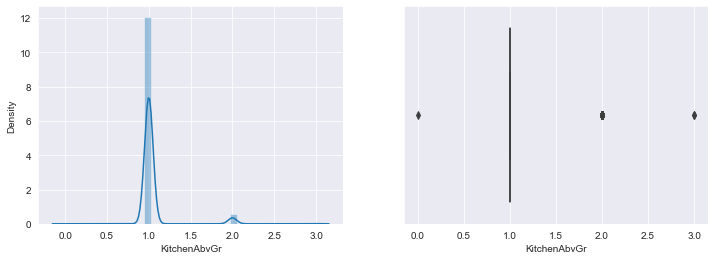

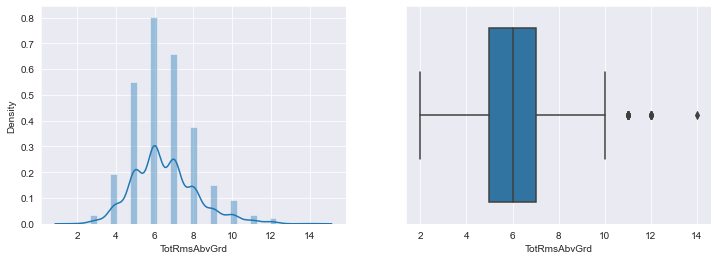

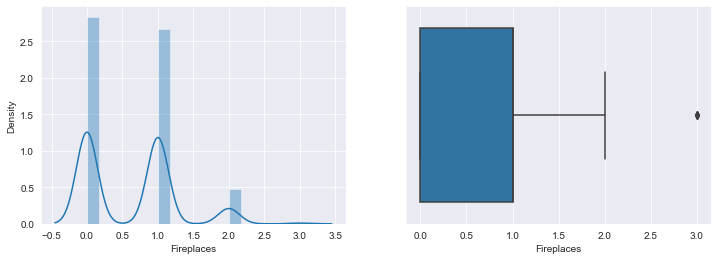

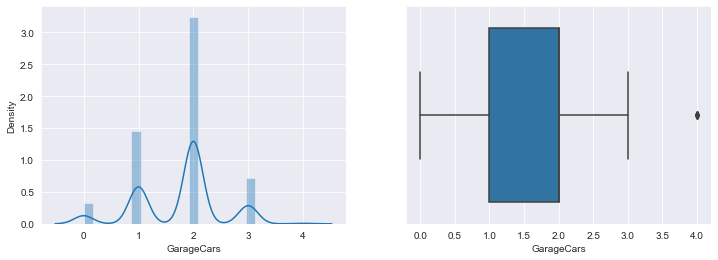

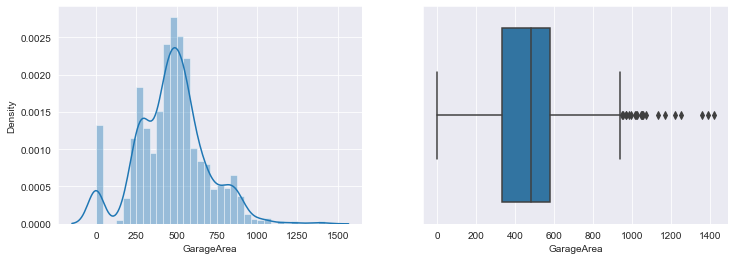

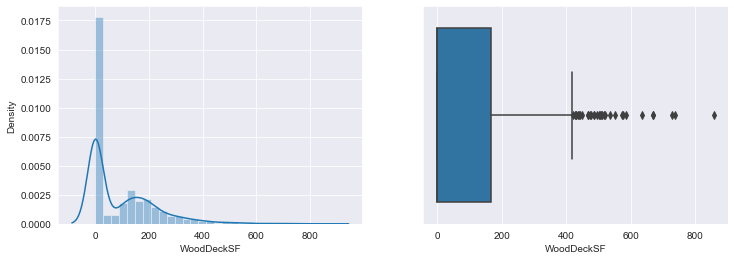

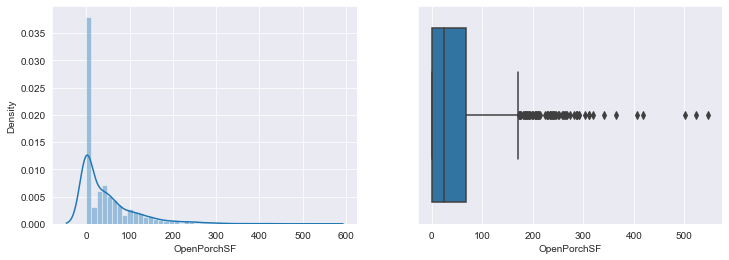

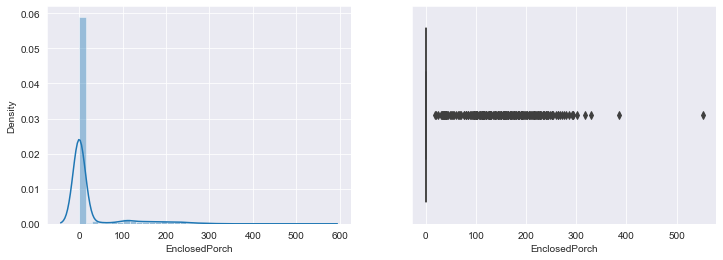

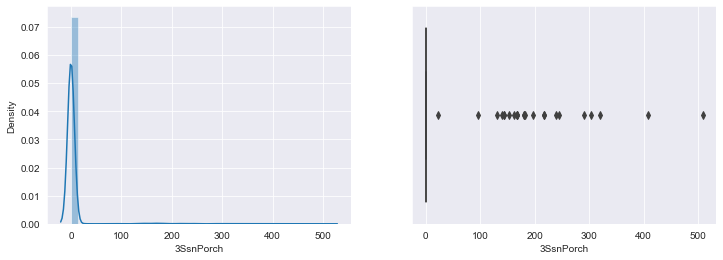

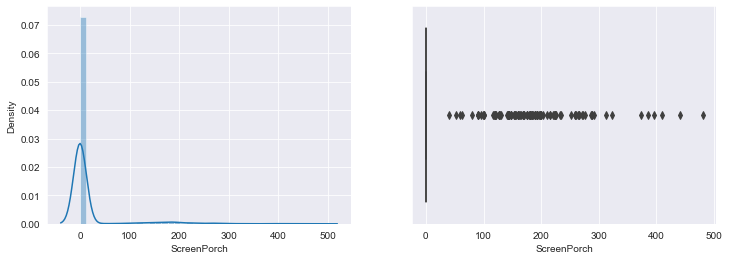

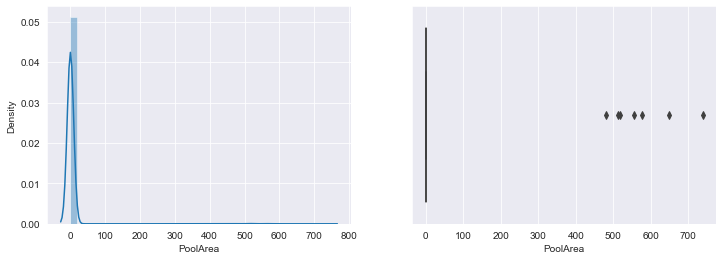

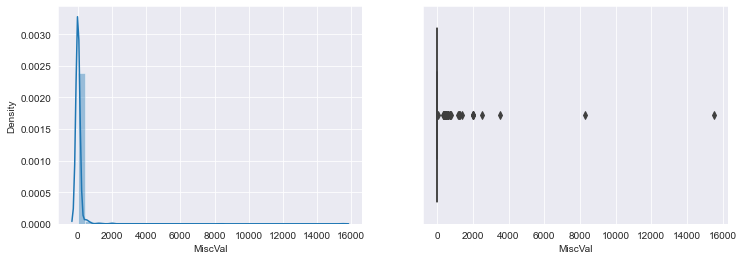

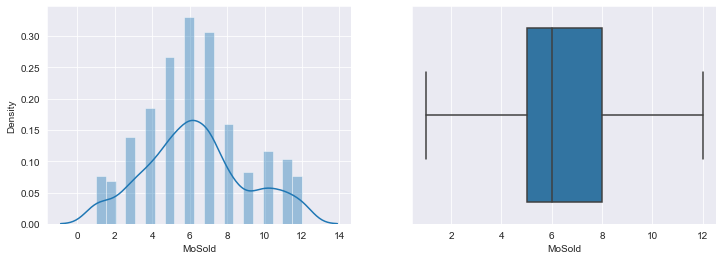

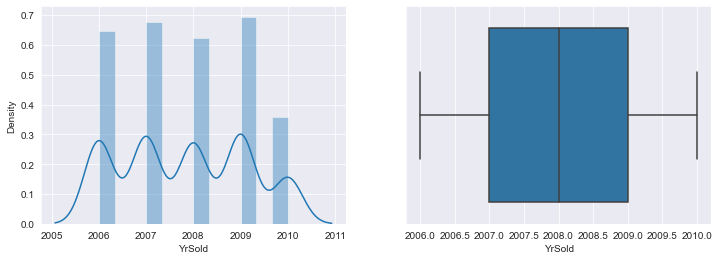

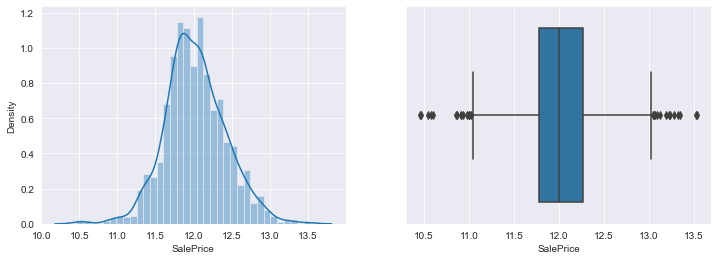

In [146]:
for col in df_num_cols.columns:
    plt.figure(figsize = (12,4))
    plt.subplot(1,2,1)
    sns.distplot(df[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(df[col])
    
plt.show()

From the above graphs, it is clearly evident that most of the variables have outliers which need be handled before proceeding further 

#### Bivariate Analysis

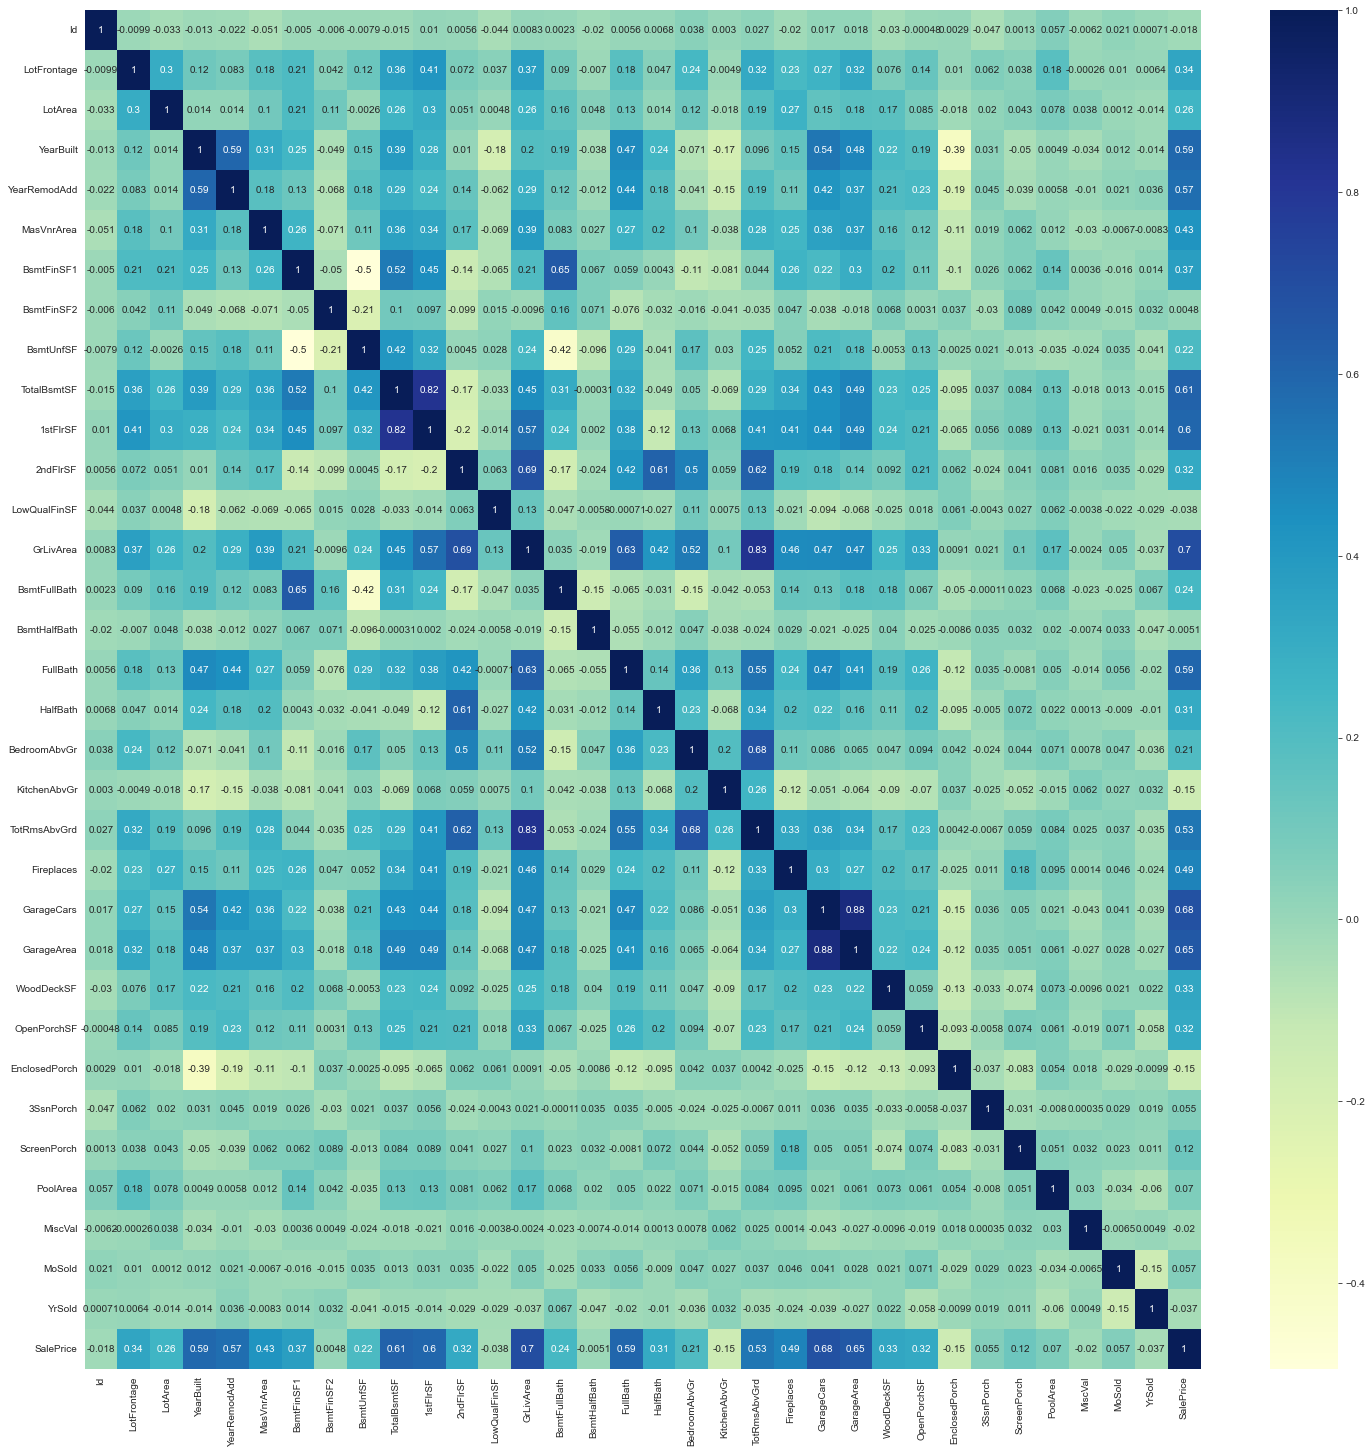

In [147]:
#Plot heatmap to detect correlations among numerical variables
plt.figure(figsize = (25, 25))
sns.heatmap(df_num_cols.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

Following interpretation can be made by visualizing the above plot
1. Some of the response variables are highly correlated
2. Target Variable 'SalePrice' is highly correlated with 'GrLivArea', 'GarageCars', 'GarageArea' and  'TotalBsmtSF' variables
3. Since most of the variables are correlated, we can use the Ridge Regression 

### 3. Feature Engineering

In [148]:
#lets look at the head of the data again
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,12.25
1,2,20,RL,80.00,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,12.11
2,3,60,RL,68.00,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,12.32
3,4,70,RL,60.00,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,11.85
4,5,60,RL,84.00,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,12.43


In [149]:
#lets drop 'Id' variable as it is just a unique number and doesnt help in analysis
df.drop('Id', 1, inplace = True)

In [150]:
#lets create the new variable 'age' which consist of the actual age of the building
df['age'] = df['YrSold'] - df['YearBuilt']

In [151]:
#lets drop the redundant variables 
df.drop(['YrSold', 'YearBuilt'], 1, inplace = True)

In [152]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,age
0,60,RL,65.00,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,WD,Normal,12.25,5
1,20,RL,80.00,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,WD,Normal,12.11,31
2,60,RL,68.00,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,WD,Normal,12.32,7
3,70,RL,60.00,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,WD,Abnorml,11.85,91
4,60,RL,84.00,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,WD,Normal,12.43,8


#### Handling Outliers

In [153]:
df_num_cols = df.select_dtypes(include = ['int64', 'float64'])

In [154]:
df_num_cols.head()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,age
0,65.00,8450,2003,196.00,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,12.25,5
1,80.00,9600,1976,0.00,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,12.11,31
2,68.00,11250,2002,162.00,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,12.32,7
3,60.00,9550,1970,0.00,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,11.85,91
4,84.00,14260,2000,350.00,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,12.43,8


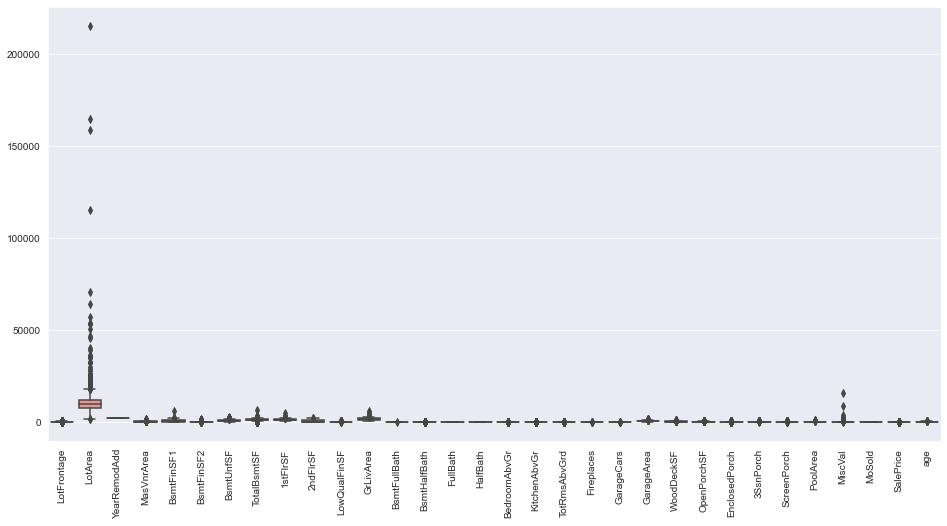

In [155]:
#plot the boxplot for each numerical variable
plt.figure(figsize = (16,8))
plt.xticks(rotation = 90)
sns.boxplot(data = df_num_cols)
plt.show()

In [156]:
#treat the outliers 
for col in df_num_cols.columns:
    df[col] = np.where(df[col] < df[col].quantile(0.05), df[col].quantile(0.05), df[col])
    df[col] = np.where(df[col] > df[col].quantile(0.95), df[col].quantile(0.95), df[col])

In [157]:
df_num_cols = df.select_dtypes(include = ['int64', 'float64'])

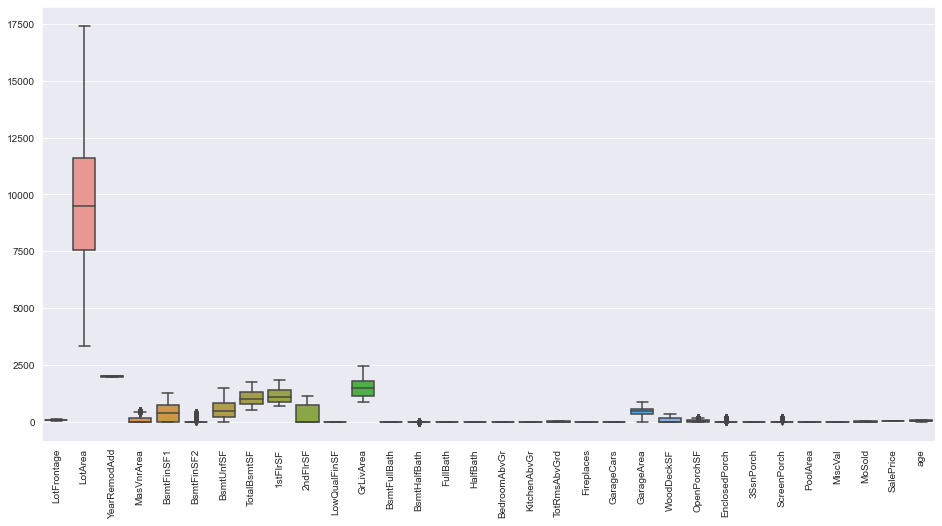

In [158]:
#rebuild the boxplot to check whether outliers are still present or not 
plt.figure(figsize = (16,8))
plt.xticks(rotation = 90)
sns.boxplot(data = df_num_cols)
plt.show()

Therefore, we have handled the outliers present in the dataset

#### Dummy Variable Creation

In [159]:
df_cat_cols.shape

(1460, 47)

In [160]:
df_cat_cols_dummy = pd.get_dummies(df_cat_cols, drop_first = True)

In [161]:
df_cat_cols_dummy.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,...,GarageYrBlt_2001,GarageYrBlt_2002,GarageYrBlt_2003,GarageYrBlt_2004,GarageYrBlt_2005,GarageYrBlt_2006,GarageYrBlt_2007,GarageYrBlt_2008,GarageYrBlt_2009,GarageYrBlt_2010,GarageYrBlt_NA,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [162]:
# merge the dummy dataset to the original dataset
df = pd.concat([df, df_cat_cols_dummy], 1)

In [163]:
df.shape

(1460, 432)

In [164]:
#drop the redundant variables 
df.drop(cat_cols_list, 1, inplace = True)

In [165]:
df.shape

(1460, 385)

### 4. Preprocessing 

#### Train - Test Split 

In [166]:
df['SalePrice'].head()

0   12.25
1   12.11
2   12.32
3   11.85
4   12.43
Name: SalePrice, dtype: float64

In [167]:
X = df.drop('SalePrice', 1)
y = df['SalePrice']

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

In [169]:
#check the dimensions of the train data 
print(X_train.shape)
print(y_train.shape)

(1021, 384)
(1021,)


In [170]:
#check the dimensions of the test data 
print(X_test.shape)
print(y_test.shape)

(439, 384)
(439,)


#### Scaling 

In [171]:
#create list of numerical variables 
num_vars_list = list(df_num_cols)

In [172]:
#drop 'SalePrice' variable 
num_vars_list.remove('SalePrice')

In [173]:
#initialize the object
scaler = MinMaxScaler()

In [174]:
# fit for train data 
X_train[num_vars_list] = scaler.fit_transform(X_train[num_vars_list])

In [175]:
X_train[num_vars_list].describe()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,age
count,"1,021.00","1,021.00","1,021.00","1,021.00","1,021.00","1,021.00","1,021.00","1,021.00","1,021.00","1,021.00","1,021.00","1,021.00","1,021.00","1,021.00","1,021.00","1,021.00","1,021.00","1,021.00","1,021.00","1,021.00","1,021.00","1,021.00","1,021.00","1,021.00","1,021.00","1,021.00","1,021.00","1,021.00","1,021.00","1,021.00","1,021.00"
mean,0.49,0.46,0.61,0.21,0.34,0.08,0.38,0.44,0.42,0.30,0.00,0.41,0.41,0.06,0.56,0.37,0.45,0.00,0.42,0.31,0.59,0.56,0.27,0.26,0.10,0.00,0.08,0.00,0.00,0.48,0.39
std,0.24,0.25,0.36,0.31,0.32,0.24,0.29,0.28,0.29,0.37,0.00,0.28,0.49,0.24,0.50,0.48,0.33,0.00,0.25,0.32,0.24,0.23,0.34,0.31,0.28,0.00,0.25,0.00,0.00,0.28,0.32
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.35,0.30,0.28,0.00,0.00,0.00,0.15,0.22,0.19,0.00,0.00,0.18,0.00,0.00,0.00,0.00,0.00,0.00,0.17,0.00,0.33,0.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.07
50%,0.49,0.45,0.77,0.00,0.31,0.00,0.33,0.38,0.37,0.00,0.00,0.39,0.00,0.00,1.00,0.00,0.50,0.00,0.33,0.50,0.67,0.57,0.00,0.15,0.00,0.00,0.00,0.00,0.00,0.44,0.38
75%,0.63,0.60,0.95,0.37,0.57,0.00,0.55,0.62,0.62,0.64,0.00,0.59,1.00,0.00,1.00,1.00,0.50,0.00,0.50,0.50,0.67,0.68,0.51,0.42,0.00,0.00,0.00,0.00,0.00,0.67,0.60
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,1.00,1.00


In [176]:
# fit for test data 
X_test[num_vars_list] = scaler.transform(X_test[num_vars_list])

In [177]:
X_test[num_vars_list].describe()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,age
count,439.00,439.00,439.00,439.00,439.00,439.00,439.00,439.00,439.00,439.00,439.00,439.00,439.00,439.00,439.00,439.00,439.00,439.00,439.00,439.00,439.00,439.00,439.00,439.00,439.00,439.00,439.00,439.00,439.00,439.00,439.00
mean,0.49,0.44,0.61,0.18,0.33,0.10,0.37,0.43,0.40,0.28,0.00,0.39,0.42,0.05,0.52,0.38,0.42,0.00,0.41,0.30,0.57,0.54,0.25,0.22,0.12,0.00,0.06,0.00,0.00,0.47,0.38
std,0.24,0.24,0.36,0.30,0.33,0.28,0.27,0.28,0.29,0.36,0.00,0.28,0.49,0.22,0.50,0.49,0.32,0.00,0.25,0.31,0.25,0.25,0.30,0.28,0.29,0.00,0.24,0.00,0.00,0.29,0.31
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.35,0.30,0.32,0.00,0.00,0.00,0.15,0.23,0.16,0.00,0.00,0.16,0.00,0.00,0.00,0.00,0.00,0.00,0.17,0.00,0.33,0.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.09
50%,0.49,0.41,0.75,0.00,0.29,0.00,0.32,0.37,0.33,0.00,0.00,0.36,0.00,0.00,1.00,0.00,0.50,0.00,0.33,0.50,0.67,0.54,0.00,0.10,0.00,0.00,0.00,0.00,0.00,0.44,0.37
75%,0.62,0.57,0.95,0.32,0.54,0.00,0.55,0.64,0.60,0.64,0.00,0.55,1.00,0.00,1.00,1.00,0.50,0.00,0.50,0.50,0.67,0.68,0.49,0.34,0.00,0.00,0.00,0.00,0.00,0.67,0.58
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,1.00,1.00


### 5. Model Building 

### Model 1 : Ridge Regression

Define a function which takes in the values of true y_train and y_test, and predicted y_train and y_test and prints out 
1. R-Squared (Train)
2. R-Squared (Test)
3. RSS (Train)
4. RSS (Test)
5. MSE (Train)
6. MSE (Test)
7. RMSE (Train)
8. RMSE (Test)
    
Also returns a list containing all the above 8 metrics

In [178]:
# Define a function for checking metrics 
def show_metrics(y_train, y_train_pred, y_test, y_pred):
     

    # Create a list to save all metrics (will be used in creating a final summary in the end)
    metrics = []
    
    # R-squared of train and test data
    print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
    metrics.append(r2_score(y_train, y_train_pred))
    print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))
    metrics.append(r2_score(y_test, y_pred))
    
    # Residual sum of squares of train and test data
    rss_train = np.sum(np.square(y_train - y_train_pred))
    metrics.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred))
    metrics.append(rss_test)
    print("RSS (Train) =", '%.2f' % rss_train)
    print("RSS (Test) =", '%.2f' % rss_test)
    
    # Mean Squared Error of train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    metrics.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred)
    metrics.append(mse_test)
    print("MSE (Train) =", '%.2f' % mse_train)
    print("MSE (Test) =", '%.2f' % mse_test)
    
    # Root Mean Squared Error for train and test data
    rmse_train = mse_train**0.5
    metrics.append(rmse_train)
    rmse_test = mse_test**0.5
    metrics.append(rmse_test)
    print("RMSE (Train) =", '%.2f' % rmse_train) 
    print("RMSE (Test) =", '%.2f' % rmse_test) 
    
    return metrics

In [179]:
## Now to create a Ridge Regression model
## we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation

ridgeCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
ridgeCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [180]:
## View the optimal value of alpha
ridgeCV.best_params_

{'alpha': 7.0}

In [181]:
## View the results of cross validation search
ridgeCV.cv_results_

{'mean_fit_time': array([0.03071957, 0.03390918, 0.02737684, 0.03166404, 0.039926  ,
        0.03445644, 0.02983246, 0.03656511, 0.03783975, 0.03035116,
        0.0334434 , 0.03191381, 0.02242808, 0.03210058, 0.03436975,
        0.03124642, 0.02812095, 0.03124356, 0.03124328, 0.03124299,
        0.03123946, 0.0312459 , 0.03124633, 0.02812071, 0.03124666,
        0.03124905, 0.03436494, 0.02607198]),
 'std_fit_time': array([3.17890010e-03, 1.09371342e-03, 4.33793312e-03, 8.30459595e-04,
        8.77789781e-03, 4.97655763e-03, 6.06249517e-03, 8.29926330e-03,
        1.81767434e-02, 4.64902253e-03, 2.19113640e-03, 1.02967378e-03,
        7.17082703e-03, 1.30330788e-02, 6.24606637e-03, 1.40646755e-06,
        1.16880915e-02, 1.27948836e-06, 1.07049677e-06, 1.14440918e-06,
        4.62900585e-06, 1.50336101e-06, 1.55685689e-06, 6.24821223e-03,
        2.33601546e-06, 4.62310777e-06, 6.25026463e-03, 6.54541419e-03]),
 'mean_score_time': array([0.00897455, 0.00718021, 0.00825958, 0.00624666, 

Thus, we got the optimum value of alpha as 7. Now we will build a ridge regression model using this value.

In [182]:
# Create a ridge regreesion instance with optimum value alpha=7
ridge = Ridge(alpha = 7)

In [183]:
# Fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=7)

In [184]:
## View the coefficients of ridge regression fitted model
ridge.coef_

array([ 0.03415122,  0.07057898,  0.06329004, -0.00103363,  0.06851744,
        0.01078038,  0.00028644,  0.11281044,  0.08775121,  0.09321722,
        0.        ,  0.17495746,  0.01523412, -0.00783827,  0.03413843,
        0.03220718,  0.02563382,  0.        ,  0.02456809,  0.04865471,
        0.06928585,  0.05828466,  0.03710306,  0.02542519,  0.00842261,
        0.        ,  0.03620628,  0.        ,  0.        ,  0.0091439 ,
       -0.08350126, -0.04898752,  0.00444097, -0.00156306,  0.00085343,
        0.0120759 ,  0.04120517,  0.04008677, -0.01055316,  0.00081063,
       -0.03546154, -0.00608431, -0.04699814, -0.00641792, -0.02509995,
        0.03387134,  0.01593557,  0.01823639, -0.02425766, -0.01242096,
       -0.01314201,  0.03879956,  0.01960203, -0.02147612, -0.00146948,
        0.04462963,  0.01673322,  0.02497878, -0.02095928,  0.02313597,
       -0.03215009, -0.00574242, -0.00645292, -0.00694557,  0.03773391,
       -0.00728252,  0.00311727,  0.03183723,  0.04138518, -0.01

In [185]:
## Make predictions
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [186]:
## Check metrics
ridge_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.94
R-Squared (Test) = 0.92
RSS (Train) = 7.32
RSS (Test) = 4.33
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.08
RMSE (Test) = 0.10


Now, lets plot R2 Score against different values of alpha for both train and test sets

In [187]:
## Create a dataframe of ridge cross validation results
ridgeCV_results= pd.DataFrame(ridgeCV.cv_results_)
ridgeCV_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.03,0.00,0.01,0.00,0.00,{'alpha': 0.0001},-0.09,-0.11,-0.11,-0.09,-0.10,-0.10,0.01,26,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,0.00
1,0.03,0.00,0.01,0.00,0.00,{'alpha': 0.001},-0.09,-0.10,-0.10,-0.09,-0.10,-0.10,0.01,25,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,0.00
2,0.03,0.00,0.01,0.01,0.01,{'alpha': 0.01},-0.09,-0.10,-0.10,-0.09,-0.09,-0.10,0.01,24,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,0.00
3,0.03,0.00,0.01,0.01,0.05,{'alpha': 0.05},-0.08,-0.10,-0.10,-0.09,-0.09,-0.09,0.01,22,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,0.00
4,0.04,0.01,0.01,0.01,0.10,{'alpha': 0.1},-0.08,-0.10,-0.10,-0.09,-0.09,-0.09,0.01,21,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,0.00
5,0.03,0.00,0.01,0.01,0.20,{'alpha': 0.2},-0.08,-0.10,-0.09,-0.09,-0.08,-0.09,0.01,20,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,0.00
6,0.03,0.01,0.01,0.01,0.30,{'alpha': 0.3},-0.08,-0.10,-0.09,-0.09,-0.08,-0.09,0.01,19,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,0.00
7,0.04,0.01,0.00,0.00,0.40,{'alpha': 0.4},-0.08,-0.09,-0.09,-0.09,-0.08,-0.09,0.01,18,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,0.00
8,0.04,0.02,0.01,0.01,0.50,{'alpha': 0.5},-0.08,-0.09,-0.09,-0.09,-0.08,-0.09,0.01,16,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,0.00
9,0.03,0.00,0.01,0.01,0.60,{'alpha': 0.6},-0.08,-0.09,-0.09,-0.09,-0.08,-0.08,0.01,15,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,0.00


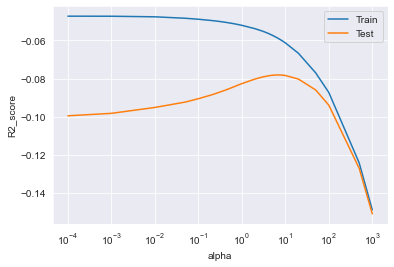

In [188]:
## Plotting R2 score vs alpha values
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

### Model 2 : Lasso Regression 

In [189]:
## Now to create a Lasso model
## we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [190]:
## View the optimal value of alpha
lassoCV.best_params_

{'alpha': 0.001}

In [191]:
## View the results of cross validation search
lassoCV.cv_results_

{'mean_fit_time': array([0.31569014, 0.08656797, 0.0427917 , 0.03124475, 0.04643445,
        0.02068782, 0.02194462, 0.02247782, 0.02499294, 0.02499552,
        0.02186904, 0.02499352, 0.02186913, 0.02499375, 0.01874747,
        0.0187458 , 0.02499213, 0.01912913, 0.02537742, 0.02323427,
        0.0196095 , 0.01941066, 0.02243557, 0.02046027, 0.0224565 ,
        0.01449604, 0.0218709 , 0.01562204]),
 'std_fit_time': array([7.73957282e-02, 1.68545974e-02, 1.07102830e-02, 9.88068528e-03,
        1.19447633e-02, 4.96667662e-03, 5.82831414e-03, 7.23696199e-03,
        7.65045080e-03, 7.65265051e-03, 7.65319546e-03, 7.65257252e-03,
        7.65370195e-03, 7.65150207e-03, 6.24995239e-03, 6.24852268e-03,
        1.24985100e-02, 7.01327354e-03, 1.31703303e-02, 9.74408618e-03,
        6.05372259e-03, 6.05384120e-03, 5.01541747e-03, 4.43178568e-03,
        8.16356174e-03, 4.28011437e-03, 7.65313704e-03, 1.90734863e-07]),
 'mean_score_time': array([0.0090395 , 0.0114141 , 0.01447005, 0.00830154, 

Thus, we got the optimum value of alpha as 0.001. Now we will build a lasso regression model using this value

In [192]:
# Create a ridge regreesion instance with optimum value alpha=0.001
lasso = Lasso(alpha=0.001)

In [193]:
# Fit the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [194]:
## View the coefficients of lasso fitted model
lasso.coef_

array([ 0.00825022,  0.07990443,  0.07240401,  0.        ,  0.07621968,
        0.        , -0.        ,  0.1301183 ,  0.        ,  0.        ,
        0.        ,  0.38532028,  0.01597832, -0.        ,  0.01413538,
        0.01865603,  0.        ,  0.        ,  0.        ,  0.05227719,
        0.10062078,  0.0493022 ,  0.03009885,  0.01955022,  0.        ,
        0.        ,  0.03105902,  0.        ,  0.        ,  0.        ,
       -0.0991305 , -0.01788512,  0.        , -0.        ,  0.        ,
        0.        ,  0.01017117,  0.        ,  0.        ,  0.        ,
       -0.01928385, -0.        , -0.04260675, -0.        , -0.00693481,
        0.        , -0.        ,  0.        , -0.05098149, -0.        ,
       -0.        ,  0.00567444,  0.00404353, -0.        , -0.00486705,
        0.00255847,  0.        , -0.        , -0.        ,  0.01786882,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.02152584,  0.01639452, -0.  

In [195]:
## Make predictions
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [196]:
## Check metrics
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.92
R-Squared (Test) = 0.92
RSS (Train) = 10.00
RSS (Test) = 4.15
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.10
RMSE (Test) = 0.10


In [197]:
## Create a dataframe of ridge cross validation results
lassoCV_results= pd.DataFrame(lassoCV.cv_results_)
lassoCV_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.32,0.08,0.01,0.01,0.00,{'alpha': 0.0001},-0.07,-0.09,-0.08,-0.08,-0.08,-0.08,0.01,2,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,0.00
1,0.09,0.02,0.01,0.00,0.00,{'alpha': 0.001},-0.07,-0.09,-0.08,-0.08,-0.07,-0.08,0.01,1,-0.07,-0.07,-0.07,-0.07,-0.07,-0.07,0.00
2,0.04,0.01,0.01,0.00,0.01,{'alpha': 0.01},-0.11,-0.12,-0.12,-0.12,-0.10,-0.11,0.01,3,-0.11,-0.10,-0.11,-0.11,-0.11,-0.11,0.00
3,0.03,0.01,0.01,0.01,0.05,{'alpha': 0.05},-0.20,-0.21,-0.22,-0.21,-0.19,-0.21,0.01,4,-0.21,-0.20,-0.20,-0.20,-0.21,-0.20,0.00
4,0.05,0.01,0.01,0.00,0.10,{'alpha': 0.1},-0.28,-0.28,-0.31,-0.28,-0.26,-0.28,0.01,5,-0.28,-0.28,-0.28,-0.28,-0.28,-0.28,0.00
5,0.02,0.00,0.01,0.01,0.20,{'alpha': 0.2},-0.29,-0.29,-0.31,-0.28,-0.27,-0.29,0.01,6,-0.29,-0.29,-0.28,-0.29,-0.29,-0.29,0.00
6,0.02,0.01,0.01,0.01,0.30,{'alpha': 0.3},-0.29,-0.29,-0.31,-0.28,-0.27,-0.29,0.01,6,-0.29,-0.29,-0.28,-0.29,-0.29,-0.29,0.00
7,0.02,0.01,0.01,0.01,0.40,{'alpha': 0.4},-0.29,-0.29,-0.31,-0.28,-0.27,-0.29,0.01,6,-0.29,-0.29,-0.28,-0.29,-0.29,-0.29,0.00
8,0.02,0.01,0.01,0.01,0.50,{'alpha': 0.5},-0.29,-0.29,-0.31,-0.28,-0.27,-0.29,0.01,6,-0.29,-0.29,-0.28,-0.29,-0.29,-0.29,0.00
9,0.02,0.01,0.00,0.00,0.60,{'alpha': 0.6},-0.29,-0.29,-0.31,-0.28,-0.27,-0.29,0.01,6,-0.29,-0.29,-0.28,-0.29,-0.29,-0.29,0.00


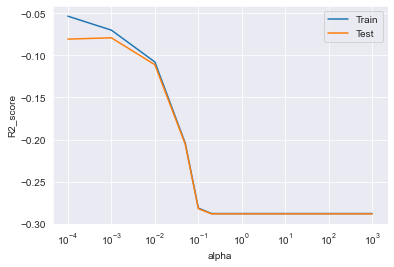

In [198]:
## Plotting R2 score vs alpha values
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'], label='Train')
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

-  As the value of alpha increases, we see a decrease in both train and test error.¶
- However, after a error value of approximately 0.05, error remains constant

### 6. Comparing 2 models - Ridge and Lasso

In [199]:
## Setting float display options
pd.options.display.float_format = "{:,.2f}".format

In [200]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

,Ridge Regression,Lasso Regression
Metric,,
R2 Score (Train),0.94,0.92
R2 Score (Test),0.92,0.92
RSS (Train),7.32,10.00
RSS (Test),4.33,4.15
MSE (Train),0.01,0.01
MSE (Test),0.01,0.01
RMSE (Train),0.08,0.10
RMSE (Test),0.10,0.10


The R-squared test score for both Ridge and Lasso Regression is 0.92

In [201]:
## Now we see the changes in coefficients after regularization

## First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas

""
LotFrontage
LotArea
YearRemodAdd
MasVnrArea
BsmtFinSF1
...
SaleCondition_AdjLand
SaleCondition_Alloca
SaleCondition_Family
SaleCondition_Normal


In [202]:
## Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [203]:
## View the betas/coefficients
pd.set_option('display.max_rows', 500)
betas 

,Ridge,Lasso
LotFrontage,0.03,0.01
LotArea,0.07,0.08
YearRemodAdd,0.06,0.07
MasVnrArea,-0.00,0.00
BsmtFinSF1,0.07,0.08
BsmtFinSF2,0.01,0.00
BsmtUnfSF,0.00,-0.00
TotalBsmtSF,0.11,0.13
1stFlrSF,0.09,0.00
2ndFlrSF,0.09,0.00


We could see that the coefficients of some of the variables have been bought down to zero by Lasso, lets look at those 

In [204]:
## View the features removed by Lasso
betas[betas['Lasso']==0]

,Ridge,Lasso
MasVnrArea,-0.00,0.00
BsmtFinSF2,0.01,0.00
BsmtUnfSF,0.00,-0.00
1stFlrSF,0.09,0.00
2ndFlrSF,0.09,0.00
LowQualFinSF,0.00,0.00
BsmtHalfBath,-0.01,-0.00
BedroomAbvGr,0.03,0.00
KitchenAbvGr,0.00,0.00
TotRmsAbvGrd,0.02,0.00


In [205]:
## View the number of features removed by lasso
betas[betas['Lasso']==0].shape

(304, 2)

In [206]:
df.shape

(1460, 385)

Therefore, we could see that the coeeficients of 304 out of 285 variables are shrinked to zero. Therefore, Lasso helps in feature selection 

### Inferences that can be drawn 

Now, lets look at the top 10 features significant in predicting the value of a house, both according to Ridge model and Lasso model

In [207]:
## View the top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

GrLivArea              0.17
TotalBsmtSF            0.11
OverallQual_9          0.10
2ndFlrSF               0.09
OverallQual_8          0.09
1stFlrSF               0.09
Neighborhood_Crawfor   0.08
OverallCond_9          0.08
Exterior1st_BrkFace    0.07
SaleCondition_Alloca   0.07
Name: Ridge, dtype: float64

In [208]:
## To interpret the ridge coefficients in terms of target, we have to take inverse log (i.e. e to the power) of betas
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

GrLivArea              1.19
TotalBsmtSF            1.12
OverallQual_9          1.11
2ndFlrSF               1.10
OverallQual_8          1.10
1stFlrSF               1.09
Neighborhood_Crawfor   1.09
OverallCond_9          1.08
Exterior1st_BrkFace    1.08
SaleCondition_Alloca   1.08
Name: Ridge, dtype: float64

In [209]:
## View the top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

GrLivArea              0.39
OverallQual_9          0.15
TotalBsmtSF            0.13
OverallQual_8          0.12
GarageCars             0.10
Neighborhood_Crawfor   0.08
LotArea                0.08
BsmtFinSF1             0.08
Functional_Typ         0.07
Exterior1st_BrkFace    0.07
Name: Lasso, dtype: float64

In [210]:
## To interpret the lasso coefficients in terms of target, we have to take inverse log (i.e. 10 to the power) of betas
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

GrLivArea              1.47
OverallQual_9          1.16
TotalBsmtSF            1.14
OverallQual_8          1.13
GarageCars             1.11
Neighborhood_Crawfor   1.09
LotArea                1.08
BsmtFinSF1             1.08
Functional_Typ         1.08
Exterior1st_BrkFace    1.08
Name: Lasso, dtype: float64

#### Optimal values of lambda

Optimal value of lambda for Ridge Regression = 7
and 
Optimal value of lambda for Lasso = 0.001

#### The variables significant in predicting the price of a house are as follows:

GrLivArea, OverallQual_9, GarageCars, OverallQual_8, Neighborhood_Crawfor, Functional_Typ, Exterior1st_BrkFace, SaleCondition_Alloca, CentralAir_Y, TotalBsmtSF, Neighborhood_Somerst, OverallCond_9, TotalBsmtSF and Condition1_Norm

#### Let's see the impace of these variables 
Here will see only top few variables

__GrLivArea__: an increase of 1 square foot of house area above ground, the price will increase by 1.19 to 1.47 times

__TotalBsmtSF__: an increase of 1 square foot of basement area, the price will increase by 1.12 to 1.14 times 

__OverallQual_9 & OverallQual_8__: if the overall material and finish of the house is Very Good or Excellent, the price of house will increase by 1.10 to 1.16 times

__GarageCars__: a unit increase in the capacity of the garage (in terms of car) the price will increase by 1.11 times  

__Neighborhood_Crawfor__: if Crawford is a nearby location, then the price of house will increase by 1.09 times

__Functional_Typ__: if the home functionality is typical, then the price of house will increase by 1.07 to 1.08 times

__Exterior1st_BrkFace__: if the exterior covering on the house is Brick Face, the price of house will increase by 1.08 times.

In a similar manner, we can deduct how well each variable describes the price of a house.

***


### Answers for the coding / descriptive questions 

#### Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?



#### Answer

In [211]:
## Let us build the ridge regression model with double value of alpha i.e. 14
ridge = Ridge(alpha=14)

# Fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=14)

In [212]:
## Make predictions
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [213]:
## Check metrics
ridge_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.94
R-Squared (Test) = 0.92
RSS (Train) = 8.16
RSS (Test) = 4.21
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.09
RMSE (Test) = 0.10


In [214]:
## Now we will build the lasso model with double value of alpha i.e. 0.002
lasso = Lasso(alpha=0.002)

# Fit the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.002)

In [215]:
## Make predictions
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [216]:
## Check metrics
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.90
R-Squared (Test) = 0.91
RSS (Train) = 12.00
RSS (Test) = 4.91
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.11
RMSE (Test) = 0.11


In [217]:
# Lets create a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

,Ridge Regression,Lasso Regression
Metric,,
R2 Score (Train),0.94,0.90
R2 Score (Test),0.92,0.91
RSS (Train),8.16,12.00
RSS (Test),4.21,4.91
MSE (Train),0.01,0.01
MSE (Test),0.01,0.01
RMSE (Train),0.09,0.11
RMSE (Test),0.10,0.11


#### Changes in Ridge Regression metrics
R2 score of train set remained the same at 0.94

R2 score of test set remained same at 0.92

#### Changes in Lasso metrics
R2 score of train set decreased from 0.92 to 0.90

R2 score of test set decreased from 0.92 to 0.91

In [218]:
## Now we see the changes in coefficients after regularization

## First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns

In [219]:
## Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [220]:
betas

,Ridge,Lasso
LotFrontage,0.03,0.00
LotArea,0.07,0.09
YearRemodAdd,0.06,0.09
MasVnrArea,0.00,0.00
BsmtFinSF1,0.07,0.08
BsmtFinSF2,0.01,0.00
BsmtUnfSF,0.01,-0.00
TotalBsmtSF,0.10,0.13
1stFlrSF,0.09,0.00
2ndFlrSF,0.08,0.00


In [221]:
## View the top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

GrLivArea              0.15
TotalBsmtSF            0.10
1stFlrSF               0.09
OverallQual_9          0.09
OverallQual_8          0.09
2ndFlrSF               0.08
Neighborhood_Crawfor   0.07
BsmtFinSF1             0.07
LotArea                0.07
GarageCars             0.07
Name: Ridge, dtype: float64

In [222]:
## View the top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

GrLivArea              0.38
TotalBsmtSF            0.13
OverallQual_9          0.11
GarageCars             0.11
OverallQual_8          0.11
YearRemodAdd           0.09
LotArea                0.09
BsmtFinSF1             0.08
Functional_Typ         0.07
Neighborhood_Crawfor   0.06
Name: Lasso, dtype: float64

#### So, the most important predictor variables after we double the alpha values are:

- GrLivArea
- OverallQual_8
- OverallQual_9
- Functional_Typ
- Neighborhood_Crawfor
- Exterior1st_BrkFace
- TotalBsmtSF
- GarageCars

***

#### Question 2

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

#### Answer 

Well, the model we choose to apply will certainly depends on the intentions and use cases 
-	If we are more concerned towards the reduction of magnitude coefficients of each variables keeping all the variables in a model, then we can go with Ridge Regression as ridge regression shrinks the coefficients to near to zero (but not zero) 
-	If we are looking for variable reduction along with determining the most important variables, then we can go with Lasso Regression as lasso regression forcefully makes the coefficients of some of the variables to almost equal to zero. 


***

#### Question 3 
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

#### Answer

Lets create the Lasso model dropping the top 5 important features 

In [223]:
#create a list of top 5 variables 
top5_list = ['GrLivArea', 'OverallQual_9', 'TotalBsmtSF', 'OverallQual_8', 'GarageCars']

In [224]:
## drop them from train and test data
X_train_dropped = X_train.drop(top5_list, axis=1)
X_test_dropped = X_test.drop(top5_list, axis=1)

In [225]:
## Now to create a Lasso model
## we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train_dropped, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [226]:
## View the optimal value of alpha
lassoCV.best_params_

{'alpha': 0.001}

In [227]:
# Create a lasso instance with optimum value alpha=0.001
lasso = Lasso(alpha=0.001)

In [228]:
# Fit the model on training data
lasso.fit(X_train_dropped, y_train)

Lasso(alpha=0.001)

In [229]:
## Make predictions
y_train_pred = lasso.predict(X_train_dropped)
y_pred = lasso.predict(X_test_dropped)

In [230]:
## Check metrics
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.91
R-Squared (Test) = 0.92
RSS (Train) = 10.93
RSS (Test) = 4.19
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.10
RMSE (Test) = 0.10


In [231]:
## Now we see the changes in coefficients after regularization

## First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X_train_dropped.columns)
betas.rows = X_train_dropped.columns

In [232]:
betas['Lasso'] = lasso.coef_

In [233]:
betas

,Lasso
LotFrontage,0.01
LotArea,0.09
YearRemodAdd,0.08
MasVnrArea,0.00
BsmtFinSF1,0.12
BsmtFinSF2,0.02
BsmtUnfSF,0.04
1stFlrSF,0.31
2ndFlrSF,0.22
LowQualFinSF,0.00


In [234]:
# View the top 5 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:5]

1stFlrSF     0.31
2ndFlrSF     0.22
GarageArea   0.15
BsmtFinSF1   0.12
LotArea      0.09
Name: Lasso, dtype: float64

After dropping the top 5 variables, we get the follwing top 5 variables 
1. 1stFlrSF
2. 2ndFlrSF
3. GarageArea
4. BsmtFinSF1
5. LotArea 


***

#### Question 4

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

#### Answer 

-	A model is said to be robust when the performance of model is not affected even though if there is any variation in the data 
-	A generalizable model is a model which has the ability to adapt properly to new, previously unseen data, drawn from the same distribution as the one used to create the model.
-	To make sure a model is robust and generalizable, we have to make sure that our model doesn’t overfit. This is because, an overfitting model has very high variance and a smallest change in data affects the model prediction heavily. Such a model will identify all the patterns of a training data, but fail to pick up the patterns in unseen test data.
-	In other words, the model should not be too complex in order to be robust and generalizable.
-	If we look at it from the perspective of Accuracy, a too complex model will have a very high accuracy. So, to make our model more robust and generalizable, we need to compromise with variance which will lead to some bias. Addition of bias means that accuracy will decrease.
-	In general, we have to develop a model that has a balance between model accuracy and complexity. This 

#### -------------------------------------------------------------------- The End -------------------------------------------------------------------------------------